##Ejercicio PCA

Para este ejercicio vamos a usar el dataset MNIST dataset. Es un dataset clásico que consiste en 60000 imagenes de números (del 0 al 9) escritos a mano, y el objetivo es clasificar los números.

Scikit-learn tiene una función load_digits que se puede utilizar para cargar el dataset. Sin embargo, dicha función sólo tiene 1700 observaciones. Asi que lo que vamos a hacer es cargar la version completa del dataset que está almacenada aquí.

Para ello usaremos el paquete pickle que es una forma de guardar objetos de python al disco duro y luego poder leerlos de nuevo.

In [ ]:
import pickle

with open('mnist.pkl', 'rb') as fname:
    mnist = pickle.load(fname)

In [ ]:
mnist_data = mnist['training_images']
mnist_target = mnist['training_labels']

In [ ]:
mnist_data.shape

(60000, 784)

El dataset consiste de 60000 imagenes de números escritos a mano, cada uno es una imagen de tamaño 28x28 pixeles (altura x anchura) en escala de grises (0 siendo el negro absoluto y 255 siendo el blanco absoluto).

In [ ]:
primer_digito = mnist_data[0]

primer_digito

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Vemos que los digitos están en un solo array de tamaño 28 x 28 = 784. Podemos mostrarlo con la función plt.imshow que muestra una imagen. Tenemos que cambiar la forma del array a (28,28).

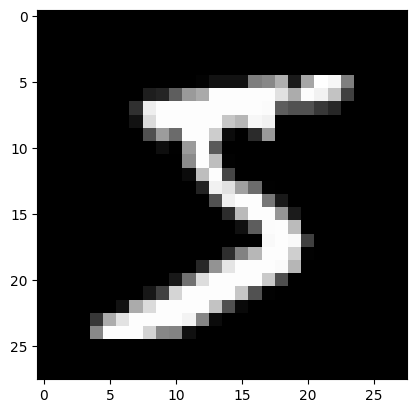

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(primer_digito.reshape(28,28), cmap='gray')

Para acelerar el ejercicio, vamos a tomar una muestra de 10000 observaciones. Si en tu ordenador tarda mucho, siempre puedes reducir el tamaño mas.

In [ ]:
import numpy as np
sample_size = 10000
np.random.seed(42)
random_sample_index = np.random.choice(mnist_data.shape[0], sample_size, replace=False)
random_sample_index


array([12628, 37730, 39991, ...,  3256, 14474, 41816])

In [ ]:
mnist_data_sample = mnist_data[random_sample_index]
mnist_target_sample = mnist_target[random_sample_index]

In [ ]:
mnist_data_sample.shape

(10000, 784)

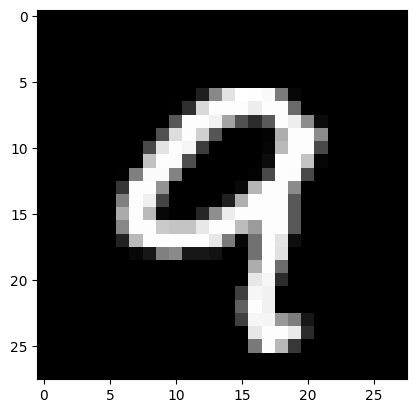

In [ ]:
plt.imshow(mnist_data_sample[-3].reshape(28,28), cmap='gray')

Usa PCA para reducir la dimensionalidad del dataset (mnist_muestra_pixeles) y usa el nuevo dataset como datos de entrenamiento para un clasificador que clasifique correctamente las imagenes. El criterio de evaluacion tiene que ser el criterio F1. Hay varias formas de usar el criterio F1 para casos de multiclase (en este caso hay 10 clases, del número 0 al 9). leer la documentación del criterio F1 puede ayudar.).

Primero vamos a observar la distribución de las clases.

In [ ]:
import pandas as pd
pd.Series(mnist_target_sample).value_counts()

,count
1,1093
7,1060
9,1010
3,1000
2,994
0,984
6,981
4,980
8,979
5,919


Observamos que no estan balanceadas por lo tanto ocuparemos f1_score

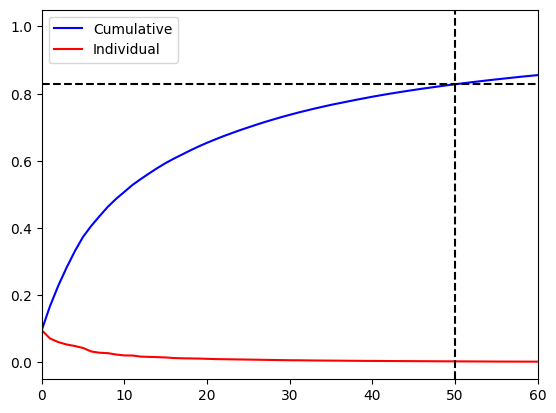

0.8280259027418696


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

pca = PCA()
pca.fit_transform(mnist_data_sample)
pca.explained_variance_ratio_.cumsum()

plt.plot(pca.explained_variance_ratio_.cumsum(), color='blue')
plt.plot(pca.explained_variance_ratio_, color='red')
plt.xlim(0,60)
plt.legend(['Cumulative', 'Individual'])
plt.axvline(x=50, ls='--', color='black')
plt.axhline(y=pca.explained_variance_ratio_.cumsum()[50], ls='--', color='black')
plt.show()

print(pca.explained_variance_ratio_.cumsum()[50])

In [ ]:
pca_data = PCA(n_components=50).fit_transform(mnist_data_sample)
print(pca_data.shape)


(10000, 50)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
KN_Clas = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(pca_data, mnist_target_sample, test_size=0.3, random_state=42)
KN_Clas.fit(X_train, y_train)

y_preds=KN_Clas.predict(X_test)
f1_score(y_test, y_preds, average='micro')

0.9503333333333334

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Clas = LogisticRegression(solver='lbfgs')
LR_Clas.fit(X_train, y_train)

y_preds=LR_Clas.predict(X_test)
f1_score(y_test, y_preds, average='micro')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.897

Podemos ver que ambos modelos ya sea KNN Classifier y Loogistic Regression tienen un buen score en f1

##Solución alternativa

In [ ]:
pca=PCA(0.8) # modelo con 80% de varianza
mnist_data_pca=pca.fit_transform(mnist_data_sample)
mnist_data_pca.shape


(10000, 44)

Solo con las primeras 44 PC basta ára tener el 80% de varianza

Ahora creamos el estimador, vamos a usar el clasificador KNN, aunque un clasificador de Regresión logística no sería mala idea, dado que la dimensionalidad no es muy alta.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint as sp_randint

clf = KNeighborsClassifier()

busqueda_dist_parametros = {
    "n_neighbors": sp_randint(2,10),
    "p": sp_randint(1,3),
    "weights": ["uniform", "distance"]
}

Ahora realizamos la busqueda aleatoria

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

busqueda = RandomizedSearchCV(estimator=clf,
                             param_distributions=busqueda_dist_parametros,
                             n_iter=30,
                             cv=3,
                             n_jobs=-1,
                             scoring="f1_micro")
busqueda.fit(X=mnist_data_pca, y=mnist_target_sample)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7da4a0b1ed90>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7da4a0b1c8d0>,
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_micro')

In [ ]:
busqueda.best_score_

np.float64(0.9539997791020854)

In [ ]:
busqueda.best_params_

{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

Ya tenemos los mejores parámetros para el clasificador

In [ ]:
from sklearn.metrics import f1_score # Re-import the f1_score function
best_model = KNeighborsClassifier(n_neighbors= 6, p= 2, weights= 'distance')
X_train, X_test, y_train, y_test = train_test_split(mnist_data_pca, mnist_target_sample, test_size=0.3, random_state=42)
best_model.fit(X=X_train, y=y_train)
y_preds = best_model.predict(X_test)
f1_score(y_test, y_preds, average='micro')


0.9533333333333334

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_model, mnist_data_pca, mnist_target_sample, cv=10, scoring='f1_micro')

array([0.955, 0.965, 0.961, 0.955, 0.961, 0.969, 0.964, 0.951, 0.957,
       0.953])